In [1]:
import numpy as np
from PIL import Image
import skimage.measure
import pandas as pd

In [2]:
traffic_06 = Image.open('./traffic_06.png')
traffic_12 = Image.open('./traffic_12.png')
traffic_18 = Image.open('./traffic_18.png')
traffic_00 = Image.open('./traffic_22.png')

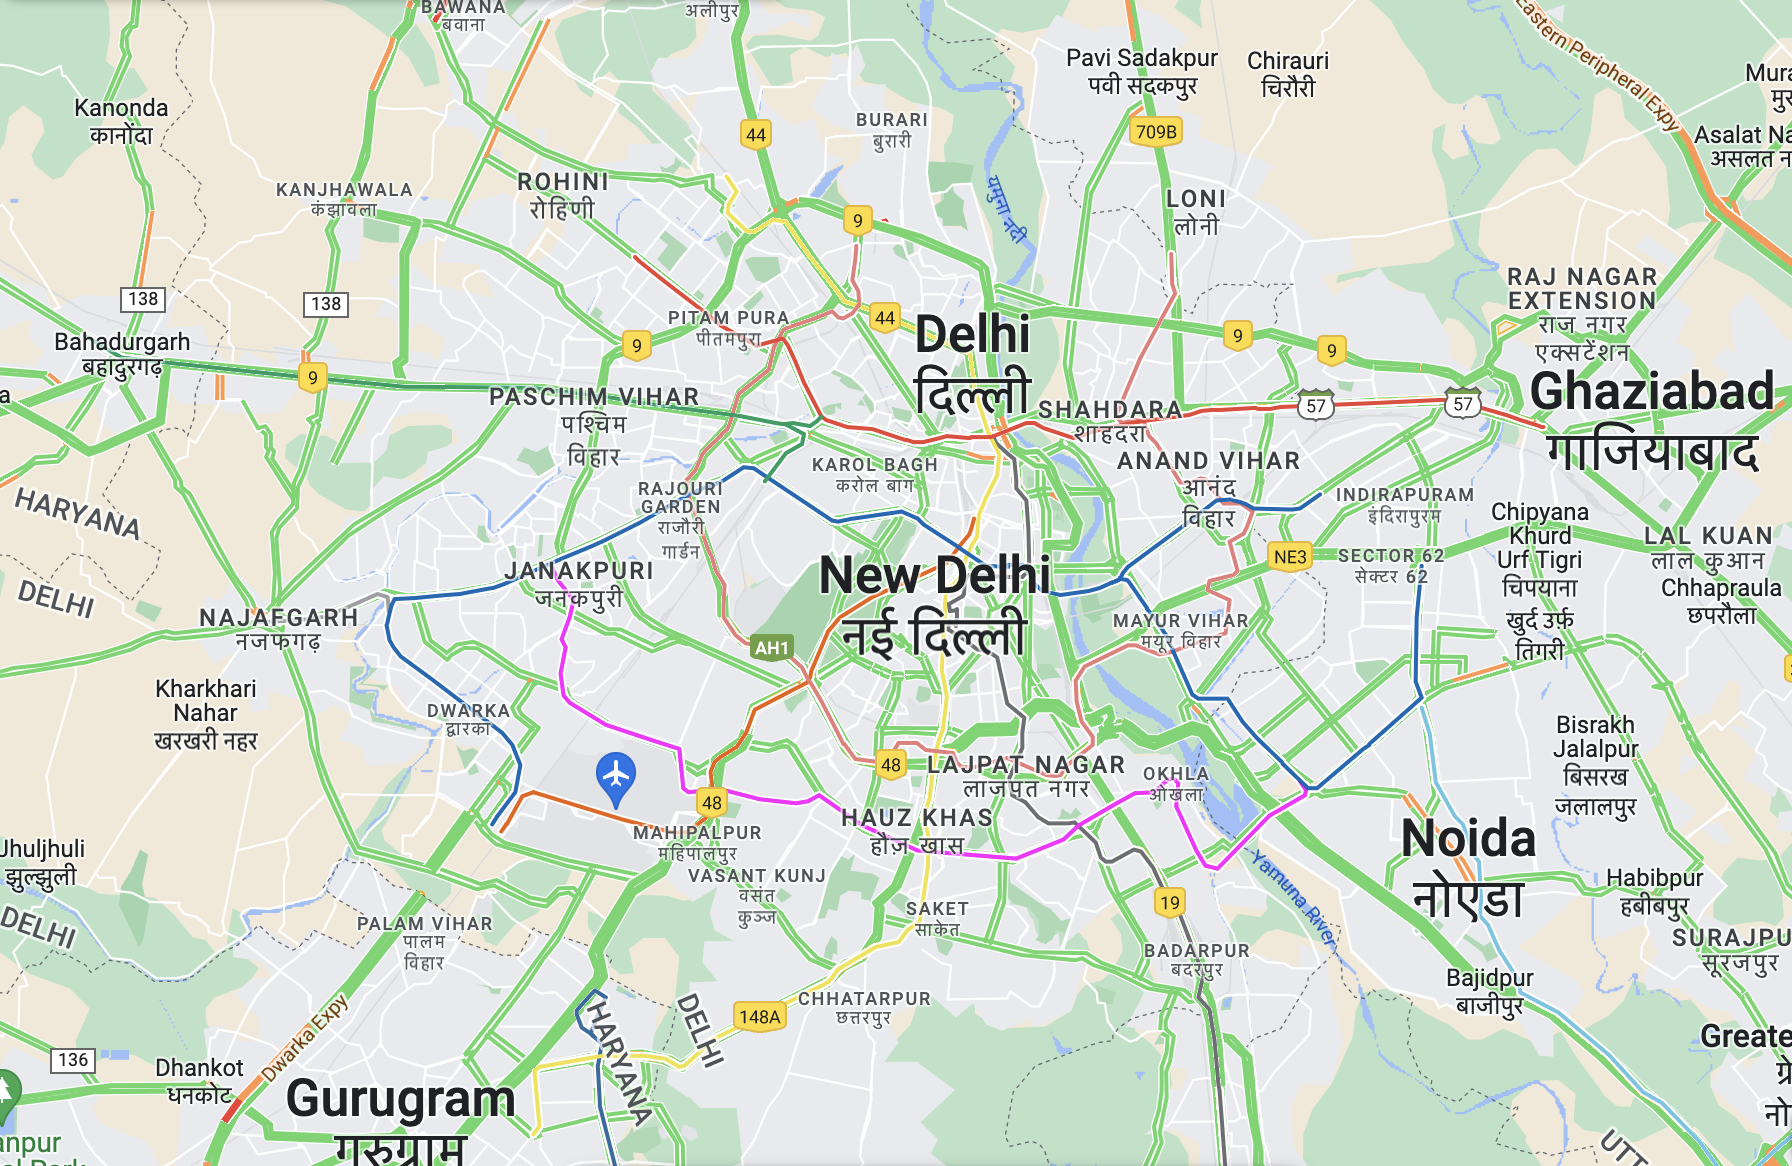

In [3]:
traffic_06

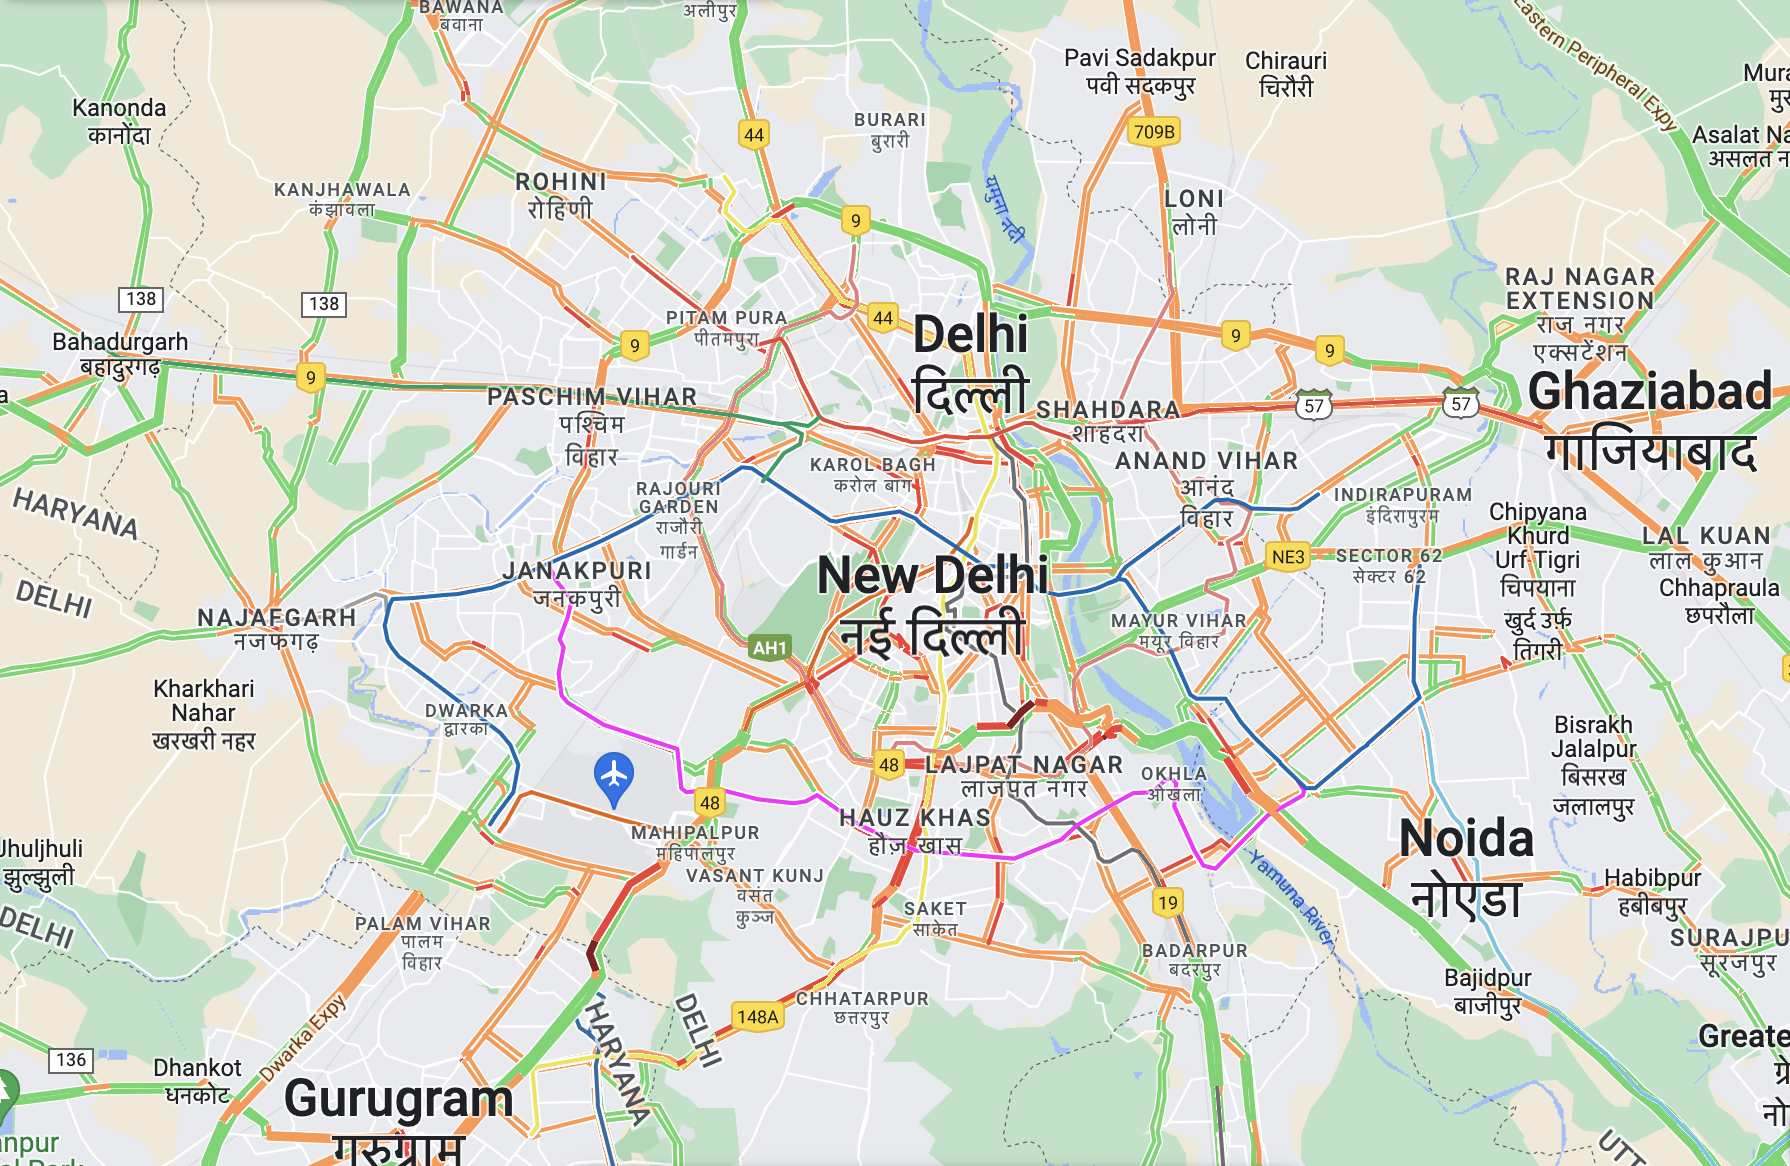

In [4]:
traffic_18

In [5]:
array_06 = np.array(traffic_06)
array_12 = np.array(traffic_12)
array_18 = np.array(traffic_18)
array_00 = np.array(traffic_00)

In [6]:
print(array_06.shape, array_12.shape, array_18.shape, array_00.shape)

(1166, 1792, 4) (1166, 1790, 4) (1166, 1790, 4) (1166, 1792, 4)


In [7]:
array_06 = array_06[:,2:,:]
array_06.shape

(1166, 1790, 4)

In [8]:
array_00 = array_00[:,2:,:]
array_00.shape

(1166, 1790, 4)

In [9]:
def is_pixel_same(px_val1, px_val2):
    diff = np.sum(abs(px_val1-px_val2))
    if(diff<20):
        return(1)
    else:
        return(0)

In [10]:
arr_traffic_only_12 = np.empty((array_06.shape[0],array_06.shape[1],array_06.shape[2])).astype(np.uint8)
for i in range(array_06.shape[0]):
    for j in range(array_06.shape[1]):
        if(is_pixel_same(array_12[i][j].astype(int),array_06[i][j].astype(int))):
            arr_traffic_only_12[i][j] = np.array([255,255,255,255]).astype(np.uint8)
        else:
            arr_traffic_only_12[i][j] = array_12[i][j].astype(np.uint8)

In [11]:
arr_traffic_only_18 = np.empty((array_06.shape[0],array_06.shape[1],array_06.shape[2])).astype(np.uint8)
for i in range(array_06.shape[0]):
    for j in range(array_06.shape[1]):
        if(is_pixel_same(array_18[i][j].astype(int),array_06[i][j].astype(int))):
            arr_traffic_only_18[i][j] = np.array([255,255,255,255]).astype(np.uint8)
        else:
            arr_traffic_only_18[i][j] = array_18[i][j].astype(np.uint8)

In [12]:
arr_traffic_only_00 = np.empty((array_06.shape[0],array_06.shape[1],array_06.shape[2])).astype(np.uint8)
for i in range(array_06.shape[0]):
    for j in range(array_06.shape[1]):
        if(is_pixel_same(array_00[i][j].astype(int),array_06[i][j].astype(int))):
            arr_traffic_only_00[i][j] = np.array([255,255,255,255]).astype(np.uint8)
        else:
            arr_traffic_only_00[i][j] = array_00[i][j].astype(np.uint8)

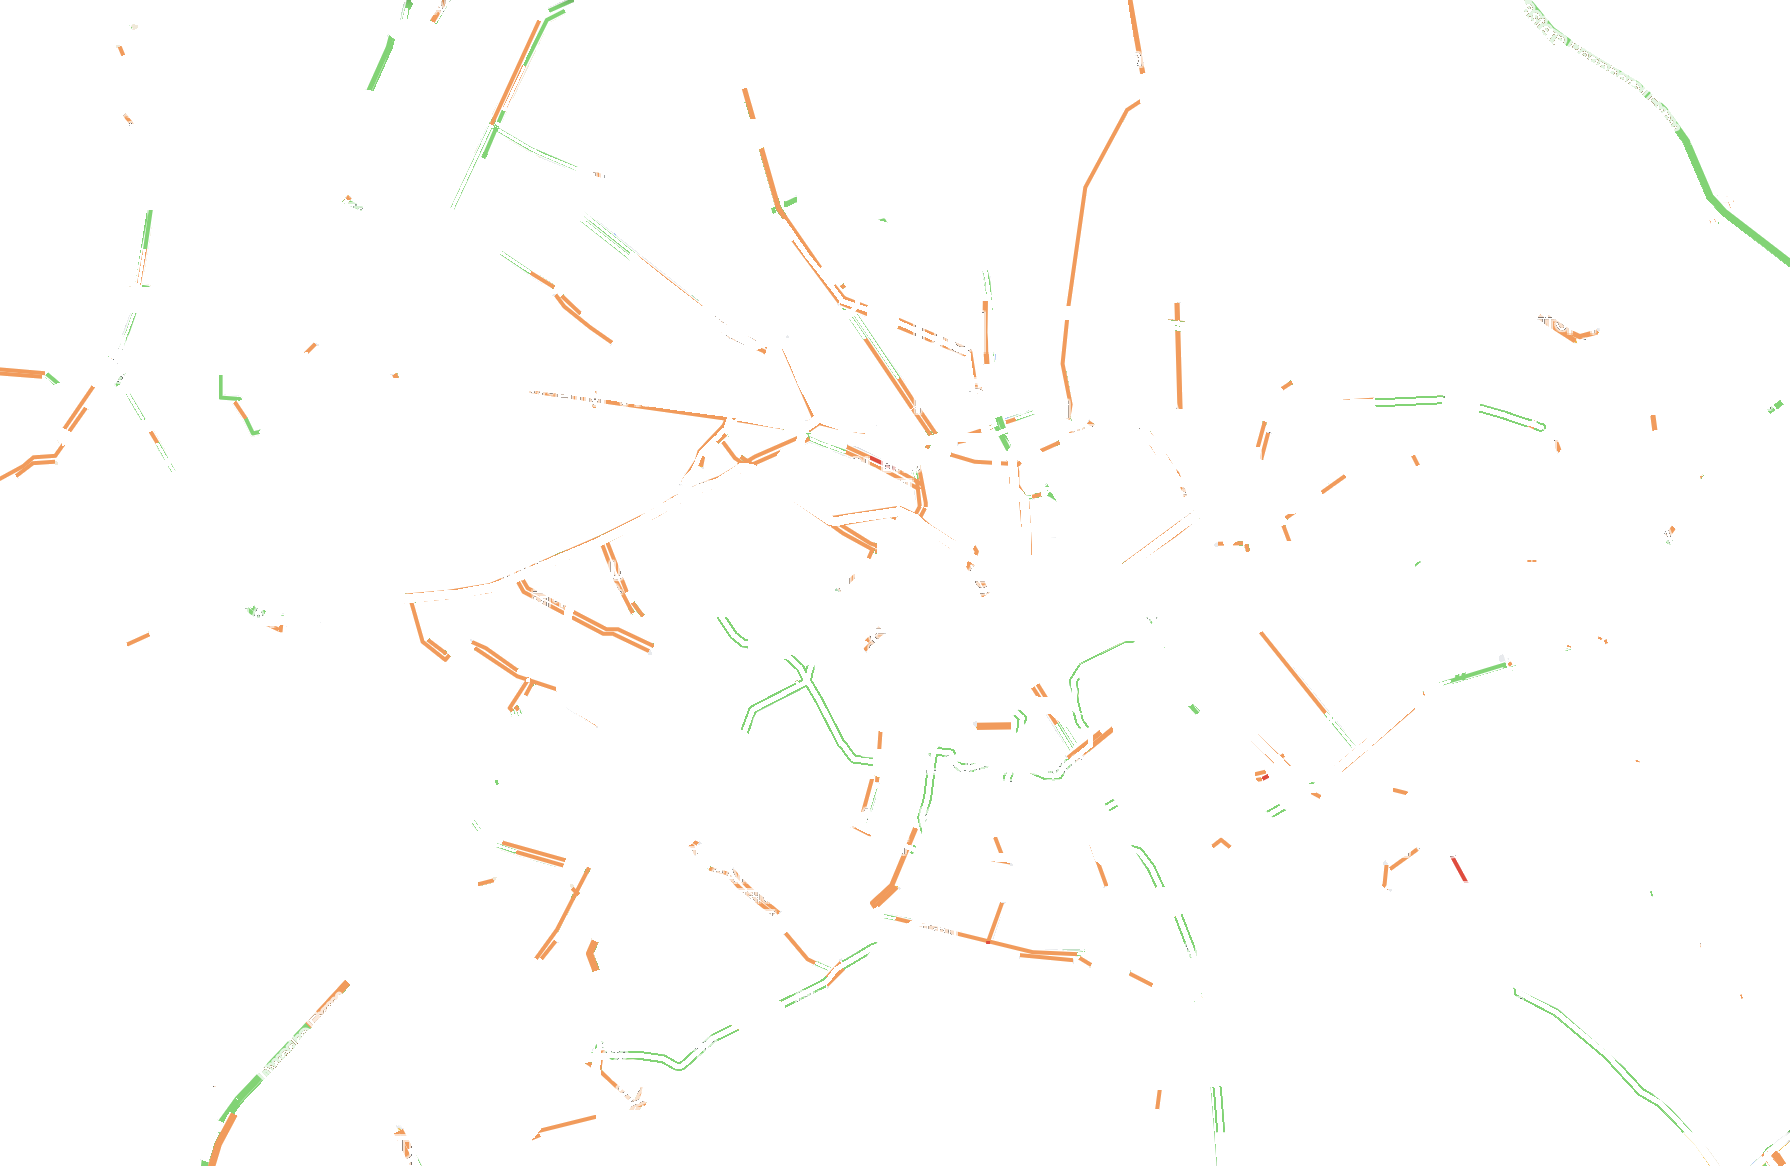

In [15]:
Image.fromarray(arr_traffic_only_00)

In [107]:
def is_pixel_red(px_val):
    assert(len(px_val) == 4)
    if(px_val[0]-max(px_val[1],px_val[2])>110):
        return(1)
    else:
        return(0)
    
def is_pixel_orange(px_val):
    assert(len(px_val) == 4)
    if(px_val[0]-max(px_val[1],px_val[2])<80 and px_val[0]-max(px_val[1],px_val[2])>60):
        return(1)
    else:
        return(0)
    
def is_pixel_maroon(px_val):
    assert(len(px_val) == 4)
    if(px_val[0]-max(px_val[1],px_val[2])>55 and max(px_val[1],px_val[2])<50):
        return(1)
    else:
        return(0)

In [108]:
lat_limits = [28.45, 28.80]
long_limits = [76.89,77.53]

In [116]:
is_pixel_red_00 = np.empty((array_00.shape[0],array_00.shape[1]))
is_pixel_orange_00 = np.empty((array_00.shape[0],array_00.shape[1]))
is_pixel_maroon_00 = np.empty((array_00.shape[0],array_00.shape[1]))
for i in range(array_00.shape[0]):
    for j in range(array_00.shape[1]):
        is_pixel_red_00[i][j] = is_pixel_red(arr_traffic_only_00[i][j].astype(int))
        is_pixel_orange_00[i][j] = is_pixel_orange(arr_traffic_only_00[i][j].astype(int))
        is_pixel_maroon_00[i][j] = is_pixel_maroon(arr_traffic_only_00[i][j].astype(int))

traffic_full_mat_00 = is_pixel_orange_00 + 2*is_pixel_red_00 + 3*is_pixel_maroon_00

traffic_cells_00 = skimage.measure.block_reduce(traffic_full_mat_00, (34,28), np.sum)

In [118]:
is_pixel_red_12 = np.empty((array_12.shape[0],array_12.shape[1]))
is_pixel_orange_12 = np.empty((array_12.shape[0],array_12.shape[1]))
is_pixel_maroon_12 = np.empty((array_12.shape[0],array_12.shape[1]))
for i in range(array_12.shape[0]):
    for j in range(array_12.shape[1]):
        is_pixel_red_12[i][j] = is_pixel_red(arr_traffic_only_12[i][j].astype(int))
        is_pixel_orange_12[i][j] = is_pixel_orange(arr_traffic_only_12[i][j].astype(int))
        is_pixel_maroon_12[i][j] = is_pixel_maroon(arr_traffic_only_12[i][j].astype(int))

traffic_full_mat_12 = is_pixel_orange_12 + 2*is_pixel_red_12 + 3*is_pixel_maroon_12

traffic_cells_12 = skimage.measure.block_reduce(traffic_full_mat_12, (34,28), np.sum)

In [119]:
is_pixel_red_18 = np.empty((array_18.shape[0],array_18.shape[1]))
is_pixel_orange_18 = np.empty((array_18.shape[0],array_18.shape[1]))
is_pixel_maroon_18 = np.empty((array_18.shape[0],array_18.shape[1]))
for i in range(array_18.shape[0]):
    for j in range(array_18.shape[1]):
        is_pixel_red_18[i][j] = is_pixel_red(arr_traffic_only_18[i][j].astype(int))
        is_pixel_orange_18[i][j] = is_pixel_orange(arr_traffic_only_18[i][j].astype(int))
        is_pixel_maroon_18[i][j] = is_pixel_maroon(arr_traffic_only_18[i][j].astype(int))

traffic_full_mat_18 = is_pixel_orange_18 + 2*is_pixel_red_18 + 3*is_pixel_maroon_18

traffic_cells_18 = skimage.measure.block_reduce(traffic_full_mat_18, (34,28), np.sum)

In [126]:
# Assume 6 am has zero traffic
zero_cells = np.zeros((80,80), dtype=np.int32)
traffic_cells_06 = zero_cells

In [130]:
zero_cells = np.zeros((80,80), dtype=np.int32)
zero_cells[25:60,4:68] = traffic_cells_00
traffic_cells_00 = zero_cells

In [132]:
zero_cells = np.zeros((80,80), dtype=np.int32)
zero_cells[25:60,4:68] = traffic_cells_12
traffic_cells_12 = zero_cells

In [133]:
zero_cells = np.zeros((80,80), dtype=np.int32)
zero_cells[25:60,4:68] = traffic_cells_18
traffic_cells_18 = zero_cells

In [134]:
np.save('traffic_06.npy', traffic_cells_06)
np.save('traffic_00.npy', traffic_cells_00)
np.save('traffic_12.npy', traffic_cells_12)
np.save('traffic_18.npy', traffic_cells_18)